In [1]:
#yolo-face_label불러오기
import os 
import shutil
file = open('./../datasets/211115_143944_144110_33.txt', "r")
img_list33=[]
x_list33=[]
while True:
    line = file.readline()
    #print(line.split('.jpg')[0].split('/')[-1])
    img_list33.append(line.split('.jpg')[0].split('/')[-1])
    #print(line.split('.jpg')[-1].split(',')[2:6])
    x_list33.append(line.split('.jpg')[-1].split(',')[2:6])
    if not line:
        break

In [2]:
file = open('./../datasets/211115_143944_144110_34.txt', "r")
img_list34=[]
x_list34=[]
while True:
    line = file.readline()
    #print(line.split('.jpg')[0].split('/')[-1])
    img_list34.append(line.split('.jpg')[0].split('/')[-1])
    #print(line.split('.jpg')[-1].split(',')[2:6])
    x_list34.append(line.split('.jpg')[-1].split(',')[2:6])
    if not line:
        break

In [3]:
#33와34의 공통된 이미지 찾기
img_list=[]
for i in img_list34:
    ii = i.split('_') 
    print(ii)
    if ii ==['', '', ''] or ii ==[''] :
        break
    iii = ii[0]+'_'+ii[1]+'_'+ii[2]+'_'+'33'+'_'+ii[-1]
    if iii in img_list33:
        #print(iii)
        img_list.append(iii)

['211115', '143944', '144110', '34', '044']
['211115', '143944', '144110', '34', '045']
['211115', '143944', '144110', '34', '046']
['211115', '143944', '144110', '34', '047']
['211115', '143944', '144110', '34', '048']
['211115', '143944', '144110', '34', '049']
['211115', '143944', '144110', '34', '050']
['211115', '143944', '144110', '34', '051']
['211115', '143944', '144110', '34', '052']
['211115', '143944', '144110', '34', '053']
['211115', '143944', '144110', '34', '054']
['211115', '143944', '144110', '34', '055']
['211115', '143944', '144110', '34', '056']
['211115', '143944', '144110', '34', '057']
['211115', '143944', '144110', '34', '058']
['211115', '143944', '144110', '34', '059']
['211115', '143944', '144110', '34', '060']
['211115', '143944', '144110', '34', '061']
['211115', '143944', '144110', '34', '062']
['211115', '143944', '144110', '34', '063']
['211115', '143944', '144110', '34', '064']
['211115', '143944', '144110', '34', '065']
['211115', '143944', '144110', '

In [4]:
#교집합의 이미지 번호 추출
img_number =[] 
for i in img_list:
    #print(i.split('_')[-1])
    img_number.append(i.split('_')[-1])
    

In [5]:
len(img_number)

32

In [6]:
import pandas as pd
import pymysql 
import pandas 
from haversine import haversine
right_camera = (36.5944523040, 126.2943242956) 


In [7]:
df = pd.read_excel('./../datasets/ADS-B/211115_143944_144110.xlsx',engine='openpyxl' )

In [8]:
import datetime as dt

time_list =[]
time = 143944 #-1할것

for i in range(0,85):

    temp_time = str(time)
    hour, min, sec = temp_time[0:2], temp_time[2:4], temp_time[4:]
    a = str((dt.datetime(2022,10,10,int(hour),int(min),int(sec)) + dt.timedelta(seconds=1)).time())
    #print(a)


    a = a.split(':')
    result1 = "".join(a)
    
    time_list.append(result1)
    time = result1

In [9]:
ans_list=[]
for i in img_number:
    #print(int(i))
    print(time_list[int(i)])
    ans_list.append(time_list[int(i)])

144031
144032
144033
144034
144035
144036
144037
144038
144039
144040
144041
144042
144043
144044
144045
144046
144047
144048
144049
144050
144051
144052
144053
144054
144055
144056
144057
144058
144059
144100
144102
144103


In [10]:
GT=[]
temp =0
num_=[]
result_list=[]
distance_list =[]
for j in range(0,len(df['InsertDateTime'])):
    for h in range(0,len(ans_list)):

        if temp == df['InsertDateTime'][j].split(' ')[-1].split('.')[0]:
            continue
        if int(df['InsertDateTime'][j].split(' ')[-1].split('.')[0]) == int(ans_list[h]) :
            #print(int(ans_list[h]))
            #print(df['InsertDateTime'][j].split(' ')[-1].split('.')[0])
            temp = df['InsertDateTime'][j].split(' ')[-1].split('.')[0]
            #print(int(time_list[h]))
            airplane = (df[' Lat'][j],df[' Lng'][j])
#                 print(df[' Lat'][j])
#                 print(df[' Lat'][j])
            result = haversine(right_camera, airplane, unit='m') 
            result_list.append(result)
        
            Alti_mi = df[' Alti'][j] 
            distance_ = result*result + Alti_mi*Alti_mi
            distance = distance_**0.5
            #distance.astype(int)
            GT.append(distance)
            #print(h)
            print(distance)
            num_.append(h)
            print('ooooooo')

1298.0696255412868
ooooooo
1297.2508441904736
ooooooo
1277.378226405262
ooooooo
1130.2106510947174
ooooooo
1090.6508013346884
ooooooo
1045.5368125006387
ooooooo
1031.1177304308312
ooooooo
1031.1177304308312
ooooooo
1031.1177304308312
ooooooo
1031.1177304308312
ooooooo
1031.1177304308312
ooooooo
838.1251268090308
ooooooo
796.7142568606163
ooooooo
763.29376218207
ooooooo
741.9699241264551
ooooooo
688.8241786795207
ooooooo
688.8241786795207
ooooooo
688.8241786795207
ooooooo
688.8241786795207
ooooooo
627.5918120615536
ooooooo
545.5041119158896
ooooooo
514.0848253913193
ooooooo
498.9961271085919
ooooooo
474.47685592436653
ooooooo
455.1791565970018
ooooooo
455.1791565970018
ooooooo
455.1791565970018
ooooooo
441.0754899776951
ooooooo
366.5670443696459
ooooooo
339.9751440862269
ooooooo
306.13819847394916
ooooooo
290.04711263883803
ooooooo


In [11]:
air_plane=[]
disparity_list=[]
j=0
for i in num_:

    print('--')
    #감지된 좌표에서 중앙값 찾기
    #print(right.pandas().xyxy[0])
    print(i)
    leftPoint = [(int(x_list33[i][2]) + int(x_list33[i][0]))/2, (int(x_list33[i][1]) + int(x_list33[i][3]))/2] 
    rightPoint = [(int(x_list34[i][2]) + int(x_list34[i][0]))/2, (int(x_list34[i][1]) + int(x_list34[i][3]))/2]

    left_width = (int(x_list33[i][3] )- int(x_list33[i][1])) # bb크기 = 비행기 크기
    right_width = (int(x_list34[i][3])- int(x_list34[i][1])) # bb크기 = 비행기 크기
    print('left_width',left_width)
    print('right_width',right_width)
    
    
    avg_ans = int((left_width+right_width)/2)
    #피라고라스 정리 a^2+b^2=c^2 x좌표 차이, y좌표차이 
    xSub = (leftPoint[0] - rightPoint[0])
    ySub = (leftPoint[1] - rightPoint[1]) 

    disparity = (xSub*xSub)+(ySub*ySub) #c^2
    disparity = disparity ** 0.5 #제곱 지우려고 루트
    disparity_list.append(disparity)
    print('disparity',disparity)

    focal_length = 1#0.153 #m
    camera_between = 1.2 #m 
    distance = (focal_length*camera_between*(8112)/(disparity*1)) #거리공식 대입
    
    #distance = result_list[j]*result_list[j] + distance *distance 
    #distance = distance**0.5
    air_plane.append(distance)
    j = j+1

    #                 distance = round(distance) #반올림
    print('비행기거리 : ', distance, 'm') #거리출력


--
0
left_width 29
right_width 31
disparity 7.158910531638177
비행기거리 :  1359.7599742278762 m
--
1
left_width 26
right_width 28
disparity 11.01135777277262
비행기거리 :  884.0326688930128 m
--
2
left_width 23
right_width 24
disparity 11.543396380615196
비행기거리 :  843.2873375419179 m
--
3
left_width 24
right_width 22
disparity 8.246211251235321
비행기거리 :  1180.4693941768398 m
--
4
left_width 23
right_width 24
disparity 9.86154146165801
비행기거리 :  987.1073440037401 m
--
5
left_width 23
right_width 24
disparity 15.692354826475215
비행기거리 :  620.3275485191485 m
--
6
left_width 25
right_width 26
disparity 17.334935823359714
비행기거리 :  561.5480841228381 m
--
7
left_width 26
right_width 26
disparity 15.008331019803634
비행기거리 :  648.599766833192 m
--
8
left_width 26
right_width 26
disparity 14.705441169852742
비행기거리 :  661.9590590696627 m
--
9
left_width 26
right_width 29
disparity 16.32482771731451
비행기거리 :  596.2941948646392 m
--
10
left_width 27
right_width 26
disparity 17.334935823359714
비행기거리 :  561.54808412

# 그래프

In [12]:
len(air_plane)

32

In [13]:
len(GT)

32

In [14]:
# import matplotlib.pyplot as plt
# import numpy as np

# # 200ms 간격으로 균일하게 샘플된 시간
# #t = np.arange(0., 20000.)
# fig1 = plt.gcf()

# # 빨간 대쉬, 파란 사각형, 녹색 삼각형
# plt.xlabel('time')
# plt.ylabel('distance')
# plt.vlines(2,0,2500,"black")
# plt.xlim([0, len(air_plane[:])]) 
# plt.plot(disparity_list, 'g--',label='disparity')
# plt.plot(air_plane, 'r--',label='distance')
# plt.legend()
# plt.show() 
# fig1.savefig('./savefig_airplane.png')

In [15]:
# import matplotlib.pyplot as plt
# import numpy as np

# # 200ms 간격으로 균일하게 샘플된 시간
# #t = np.arange(0., 20000.)
# fig1 = plt.gcf()

# # 빨간 대쉬, 파란 사각형, 녹색 삼각형
# plt.xlabel('time')
# plt.ylabel('distance')

# plt.plot(air_plane[:], 'r--',label='distance')
# plt.plot(disparity_list[:], 'g--',label='disparity')

# plt.legend()


# plt.show()
# fig1.savefig('./savefig_airplane_re.png')

In [16]:
# import matplotlib.pyplot as plt
# import numpy as np

# # 200ms 간격으로 균일하게 샘플된 시간
# #t = np.arange(0., 20000.)
# fig1 = plt.gcf()

# # 빨간 대쉬, 파란 사각형, 녹색 삼각형
# plt.xlabel('time')
# plt.ylabel('distance')
# plt.vlines(7,0,500,"black")
# plt.plot(disparity_list, 'r--')
# plt.show()
# fig1.savefig('./savefig_disparity.png')

In [17]:
# import matplotlib.pyplot as plt
# import numpy as np

# # 200ms 간격으로 균일하게 샘플된 시간
# #t = np.arange(0., 20000.)
# fig1 = plt.gcf()

# # 빨간 대쉬, 파란 사각형, 녹색 삼각형
# plt.xlabel('time')
# plt.ylabel('distance')
# #plt.vlines(5,0,4000,"black")

# plt.plot(air_plane[2:], 'r--')
# plt.plot(disparity_list[2:], 'r--')
# plt.show()
# fig1.savefig('./savefig_default.png')

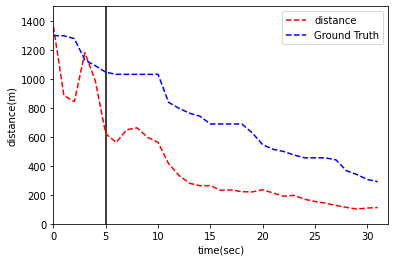

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# 200ms 간격으로 균일하게 샘플된 시간
#t = np.arange(0., 20000.)

fig1 = plt.gcf()
# 빨간 대쉬, 파란 사각형, 녹색 삼각형
plt.xlabel('time(sec)')
plt.ylabel('distance(m)')
plt.vlines(5,0,5000,"black")
plt.xlim([0, len(air_plane[:])]) 
plt.plot(air_plane[:], 'r--',label='distance')
plt.plot( GT[:], 'b--',label='Ground Truth')
plt.legend()
plt.xlim([0, len(air_plane)])     
plt.ylim([0, 1500])
plt.show()
fig1.savefig('./raw_data_14410.png')

In [19]:
air_plane[5]

620.3275485191485

In [20]:
GT[5]

1045.5368125006387

In [21]:
air_plane_list=[]
for i in air_plane:
    air_plane_list.append(i*1.68)

In [22]:
air_plane_list[5]

1042.1502815121696

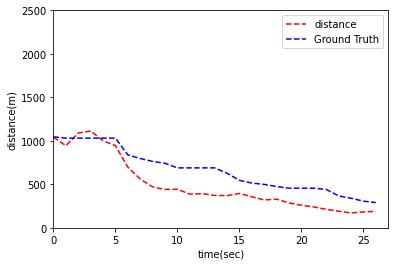

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# 200ms 간격으로 균일하게 샘플된 시간
#t = np.arange(0., 20000.)

fig1 = plt.gcf()
# 빨간 대쉬, 파란 사각형, 녹색 삼각형
plt.xlabel('time(sec)')
plt.ylabel('distance(m)')
plt.plot(air_plane_list[5:], 'r--',label='distance')
plt.plot( GT[5:], 'b--',label='Ground Truth')
plt.xlim([0, len(air_plane_list[5:])]) 
plt.legend()
plt.xlim([0, len(air_plane_list[5:])])  
plt.ylim([0, 2500])
plt.show()
fig1.savefig('./raw_data_14410_re.png')

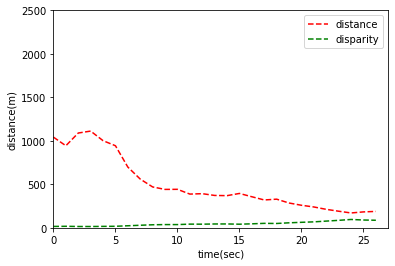

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# 200ms 간격으로 균일하게 샘플된 시간
#t = np.arange(0., 20000.)

fig1 = plt.gcf()
# 빨간 대쉬, 파란 사각형, 녹색 삼각형
plt.xlabel('time(sec)')
plt.ylabel('distance(m)')
plt.plot(air_plane_list[5:], 'r--',label='distance')
plt.plot( disparity_list[5:], 'g--',label='disparity')
plt.legend()
plt.xlim([0, len(air_plane_list[5:])]) 
plt.ylim([0, 2500])
plt.show()
fig1.savefig('./raw_data_14410_disparity.png')

# moving average filter

In [25]:
import numpy as np
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

data = np.array(air_plane_list[5:])

print(moving_average(data,4))

[1046.82247259 1036.72846405 1036.72846405  938.80727055  800.77025906
  667.74008112  542.24749971  478.36653611  435.28625407  415.97051238
  398.61627736  380.420013    382.26813199  373.43025424  360.43502966
  350.31890848  322.81162707  298.31745102  278.18638862  248.93433755
  225.34096924  203.2409958   189.06486007  183.13787524]


In [26]:
mv_airplane = moving_average(data,4)
mv_airplane  = mv_airplane *0.9884412381684676

In [27]:
len(mv_airplane )

24

In [28]:
mv_GT = moving_average(GT[5:],4)

In [29]:
mv_airplane[0]

1034.7225009482831

In [30]:
mv_GT[0]

1034.7225009482831

In [31]:
mv_GT[0]/mv_airplane[0]

1.0

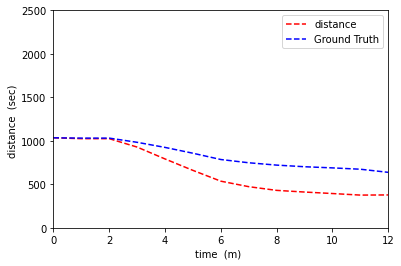

In [45]:
import matplotlib.pyplot as plt
import numpy as np


# 200ms 간격으로 균일하게 샘플된 시간
#t = np.arange(0., 20000.)
fig1 = plt.gcf()
plt.xlabel('time  (m)  ')
plt.ylabel('distance  (sec) ')
# 빨간 대쉬, 파란 사각형, 녹색 삼각형
plt.plot(mv_airplane[:], 'r--',label='distance')
plt.plot(mv_GT[:], 'b--',label='Ground Truth')
plt.legend()
plt.xlim([0, 12])     
plt.ylim([0, 2500])
plt.show()
fig1.savefig('./mv_14410.png')

# low pass filter

In [33]:
len(air_plane)

32

In [34]:
import numpy as np

class LowPassFilter:
    def __init__(self, cutoff_freq, ts):
        self.ts = ts
        self.cutoff_freq = cutoff_freq
        self.pre_out = 0.
        self.tau = self.calc_filter_coef() 
        
    def calc_filter_coef(self):
        w_cut = 2*np.pi*self.cutoff_freq
        return 1/w_cut
        
    def filter(self, data):
        out = (self.tau * self.pre_out + self.ts * data) / (self.tau + self.ts)
        self.pre_out = out
        return out

In [35]:
lpf = LowPassFilter(cutoff_freq = 4, ts = 0.1)


In [36]:
air_plane_low = [lpf.filter(data) for data in air_plane_list[5:]]
GT_low = [lpf.filter(data) for data in GT[5:]]


In [37]:
air_plane_low = air_plane_low*1

In [38]:
air_plane_low_list= []
for i in air_plane_low:
    air_plane_low_list.append(i*1.074471380269518)

In [39]:
air_plane_low_list[0]

801.0378269986024

In [40]:
GT_low[0]

801.0378269986024

In [41]:
GT_low[0]/air_plane_low_list[0]

1.0

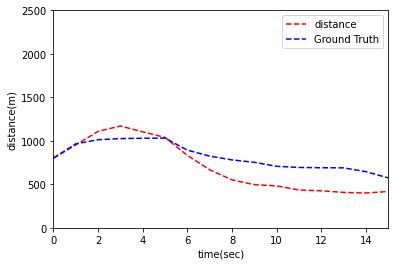

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# 200ms 간격으로 균일하게 샘플된 시간
#t = np.arange(0., 20000.)
fig1 = plt.gcf()
# 빨간 대쉬, 파란 사각형, 녹색 삼각형
plt.xlabel('time(sec)')
plt.ylabel('distance(m)')
plt.plot(air_plane_low_list[:], 'r--',label='distance')
plt.plot( GT_low[:], 'b--',label='Ground Truth')
plt.legend()
plt.xlim([0, 15])     
plt.ylim([0, 2500])
plt.show()
fig1.savefig('./low_14410.png')


# RMSE

In [43]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(air_plane_low_list, GT_low)**0.5

print('low',RMSE)

RMSE = mean_squared_error(mv_airplane, mv_GT)**0.5

print('mv',RMSE)

RMSE = mean_squared_error(np.array(air_plane_list[5:]), np.array(GT[5:]))**0.5

print('raw',RMSE)

low 172.35773819716368
mv 203.33098471929745
raw 195.943768469855
